# <font color=red> CMT307 Applied Machine Learning </font>
<a class="anchor" id="main_title"></a>
## Coursework 2 - 2021-2022 Spring semester
### Group 12
<br/>

[Matthew Esposito](mailto:EspositoMD1@cardiff.ac.uk)<br />
[Chuntong Huang](mailto:HuangC31@cardiff.ac.uk)<br />
[Matthew Jepson](mailto:JepsonMW@cardiff.ac.uk)<br />
[Guoyi Jia](mailto:JiaG@cardiff.ac.uk)<br /> 
[Zhicong Tang](mailto:TangZ19@cardiff.ac.uk)<br /> 
[Hekang Zhang](mailto:ZhangH120@cardiff.ac.uk)<br /> 
[Xiaoling Zhu](mailto:ZhuX41@cardiff.ac.uk)<br />
[Jose Mendoza](mailto:mendoza-jimenezjc@cardiff.ac.uk)<br />


<a class="anchor" id="index"></a>
# Contents
***
## [0. Import required modules](#0)
<br/>

***
## [1. Descriptive analysis of the dataset + Error analysis](#1)
<br/>

### [1.0. Data load ](#1_0)
### [1.1. Exploratory data analysis ](#1_1)
### [1.2. Data visualization ](#1_2)

<br/>

***
## [2. Preprocessing + Literature review](#2)
<br/>

### [2.1 Data pre-processing](#2_1)
### [2.2 Literature review](#2_2)

<br/>

***
## [3. Implementation + results](#3)
<br/>

### [3.1 Model implementation](#3_1)
#### [3.1.1. CNN arquitechture ](#3_1_1)

<br/>

### [3.2 Model training and parameter tuning](#3_2)

### [3.3 Performance review](#3_3)

<br/>


Initial discussion and project scope

***
# 0. Import required modules
<a class="anchor" id="0"></a>
#### [Return to index](#main_title)
<br/>

Import required packages for each part of the coursework:


In [3]:
# General modules:
import numpy as np
import os
import random

# Exploratory data analysis:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
# Data pre-processing
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [ ]:
# Machine learning module
import tensorflow as tf
import keras

In [106]:
# Task modules:
from t0_module import x_train, y_train, x_test, y_test, class_names, train_dir, test_dir, train_summary_df


ImportError: cannot import name 'train_summary_df' from 't0_module' (C:\Users\Jose Carlos\Documents\local_repositories\cmt307-g12\t0_module.py)

***
# 1. Descriptive analysis of the dataset + error analysis 
<a class="anchor" id="1"></a>
#### [Return to index](#main_title)
<br/>

The scope of this section is to get a general idea of the whole dataset.
We will start creating a histogram to see how many pictures are available for each category.

## 1.0 Data load 
<a class="anchor" id="1_0"></a>
#### [Return to index](#main_title)

In [5]:
train_df = pd.read_csv("data/Train.csv")
test_df = pd.read_csv("data/Test.csv")

train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [6]:
train_df['Area'] = train_df.Height * train_df.Width

train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Area
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,702
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,756
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,754
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,756
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,728


## Create a dataframe with summary data per **category**: 
### train_df_cat

In [7]:
train_df_cat = train_df.groupby('ClassId').mean().sort_values(by='Area', ascending=True)

print(train_df_cat.head())

             Width     Height    Roi.X1    Roi.Y1     Roi.X2     Roi.Y2  \
ClassId                                                                   
17       38.010811  40.273874  5.518018  5.613514  32.844144  35.081982   
6        40.404762  42.126190  5.576190  5.595238  35.185714  36.850000   
42       41.145833  41.291667  5.558333  5.579167  35.870833  36.041667   
32       41.004167  41.425000  5.700000  5.670833  35.675000  36.058333   
5        42.515054  42.823656  5.663978  5.663978  37.225806  37.518817   

                Area  
ClassId               
17       1677.474775  
6        1881.604762  
42       1885.904167  
32       1968.908333  
5        2083.274194  


### Create a barplot to explore average picture area:

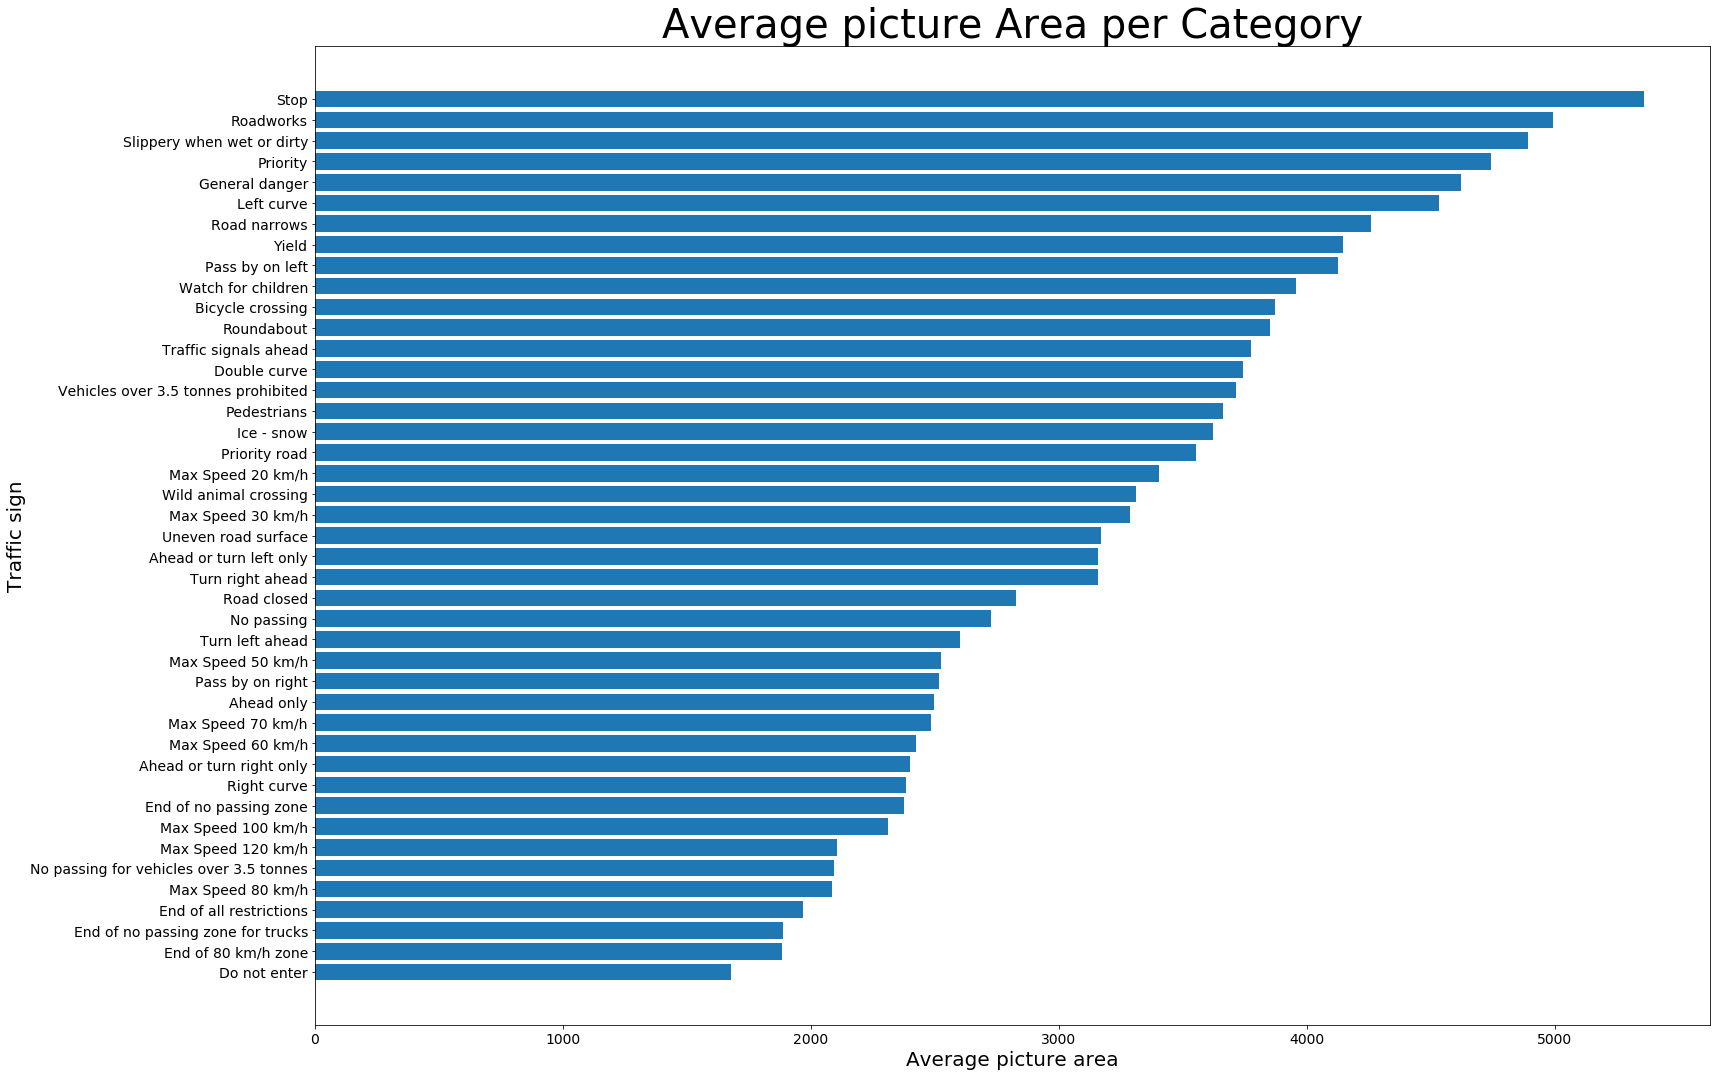

In [79]:
fig = plt.figure(figsize=(25, 18))
ax=plt.subplot()

plt.barh(range(len(train_df_cat)), train_df_cat['Area'])
plt.title('Average picture Area per Category', fontsize=40)
plt.xlabel('Average picture area', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_df_cat.index ]
ax.set_yticks(range(len(train_df_cat)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

### Create a barplot to explore number of pictures per category:

In [10]:
train_counts = train_df.ClassId.value_counts().sort_values(ascending = True)


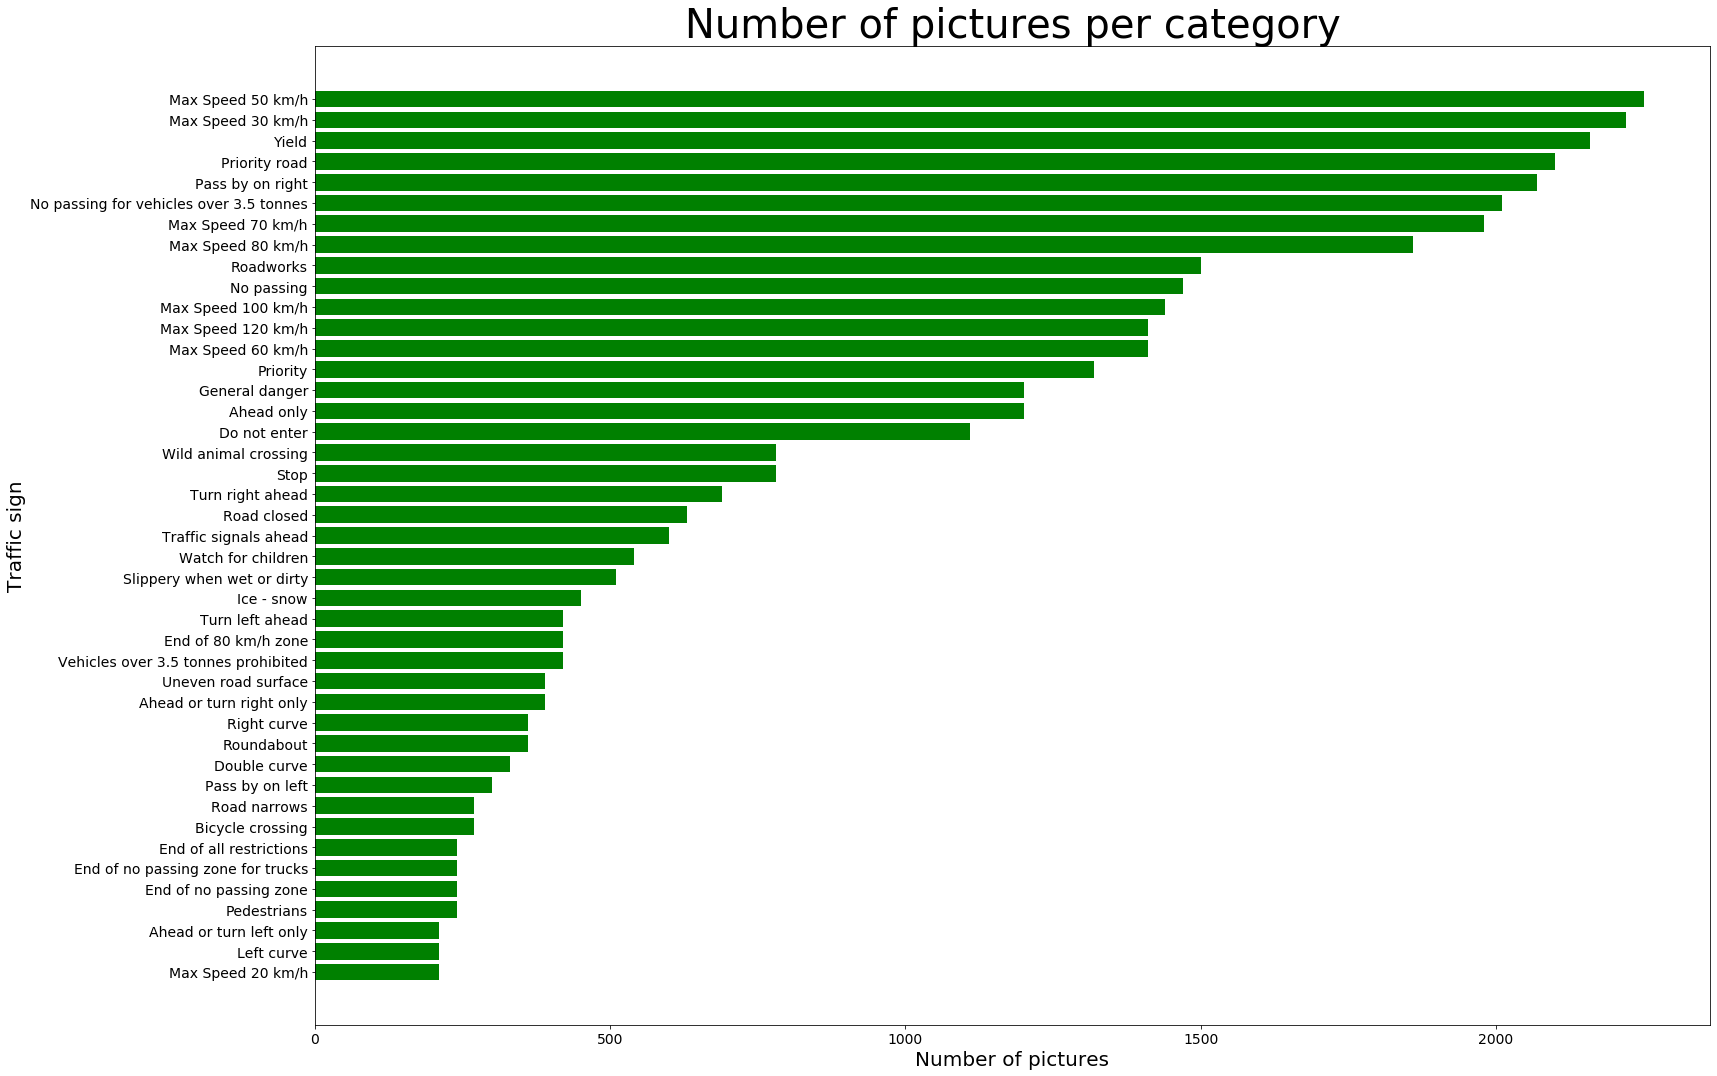

In [78]:
fig = plt.figure(figsize=(25, 18))
ax=plt.subplot()

plt.barh(range(len(train_counts)), train_counts.values, color = 'green')
plt.title('Number of pictures per category', fontsize=40)
plt.xlabel('Number of pictures', fontsize = 20)
plt.ylabel('Traffic sign', fontsize = 20)

labels = [ class_names[i] for i in train_counts.index ]

ax.set_yticks(range(len(train_counts)))
ax.set_yticklabels(labels)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [59]:
y_train

array(['Max Speed 20 km/h', 'Max Speed 20 km/h', 'Max Speed 20 km/h', ...,
       'End of no passing zone for trucks',
       'End of no passing zone for trucks',
       'End of no passing zone for trucks'], dtype='<U39')

## Create a dataframe from decoded train pictures: 
### x_train + y_train -> df_pixels

In [15]:
print('x_train length: ', len(x_train) )
print('y_train length: ', len(y_train) )

pic_means = [ picture.mean() for picture in x_train]

df_pixels = pd.DataFrame( list(zip(pic_means, y_train)), columns=['Picture avg', 'Category']  )

df_pixels


x_train length:  39209
y_train length:  39209


,Picture avg,Category
0,128.588506,Max Speed 20 km/h
1,129.371111,Max Speed 20 km/h
2,127.922593,Max Speed 20 km/h
3,126.164759,Max Speed 20 km/h
4,130.678125,Max Speed 20 km/h
...,...,...
39204,28.877976,End of no passing zone for trucks
39205,28.602422,End of no passing zone for trucks
39206,28.502966,End of no passing zone for trucks
39207,28.370217,End of no passing zone for trucks


## Box plot of picture's individual average intensity per category:

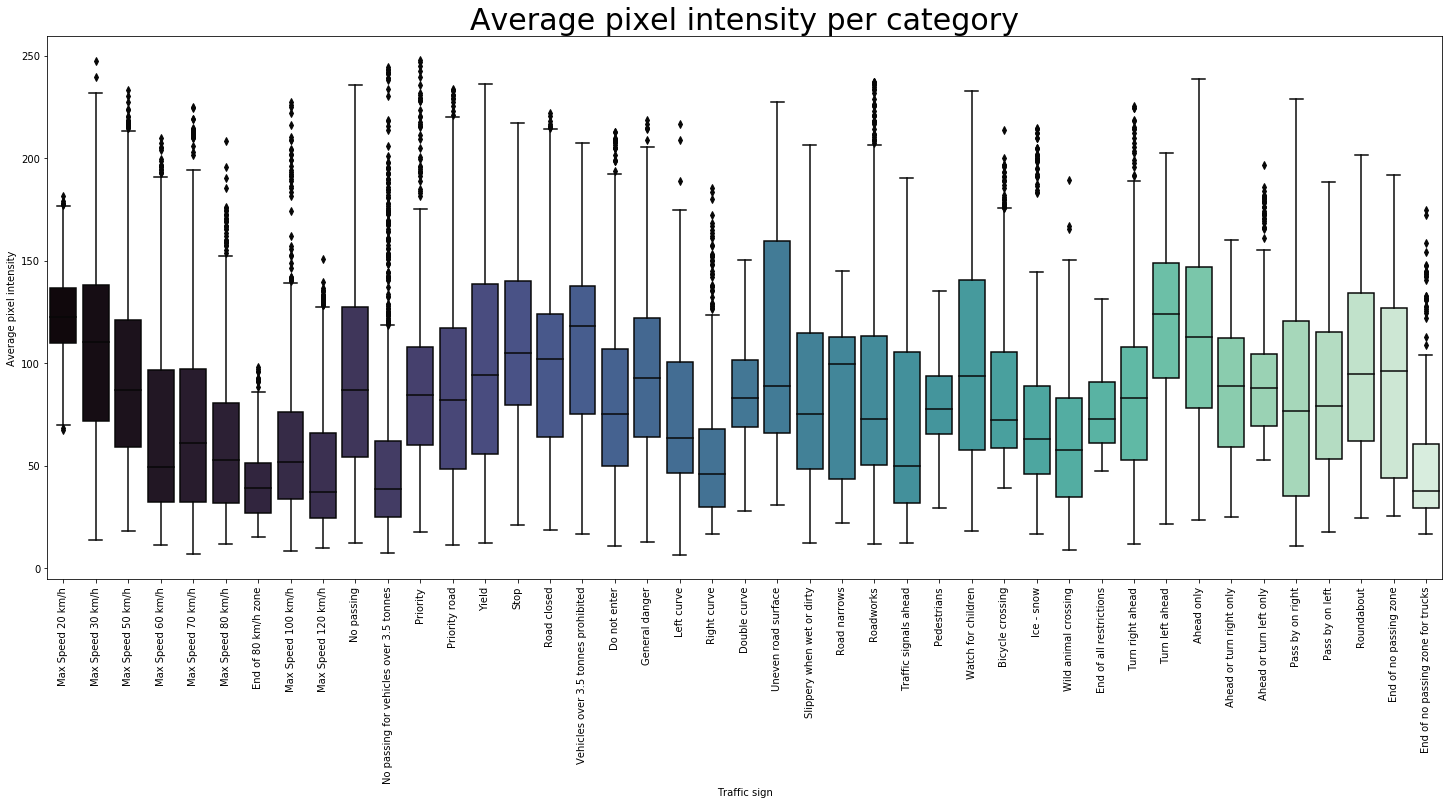

In [16]:
# box plot showing relationship between education and compenstation
fig = plt.figure(figsize=(25, 10))
ax=plt.subplot()

sns.boxplot(x = "Category", y = "Picture avg", palette = "mako", data = df_pixels)
plt.title('Average pixel intensity per category', fontsize=30)
plt.xlabel('Traffic sign')
plt.ylabel('Average pixel intensity')

#labels = [ class_names[i] for i in train_counts.index ]
#ax.set_xticks(range(len(train_counts)))
#ax.set_xticklabels(labels, rotation = 90)

plt.xticks(rotation = 90)

plt.show()

## Distribution of picture's average intensity per category

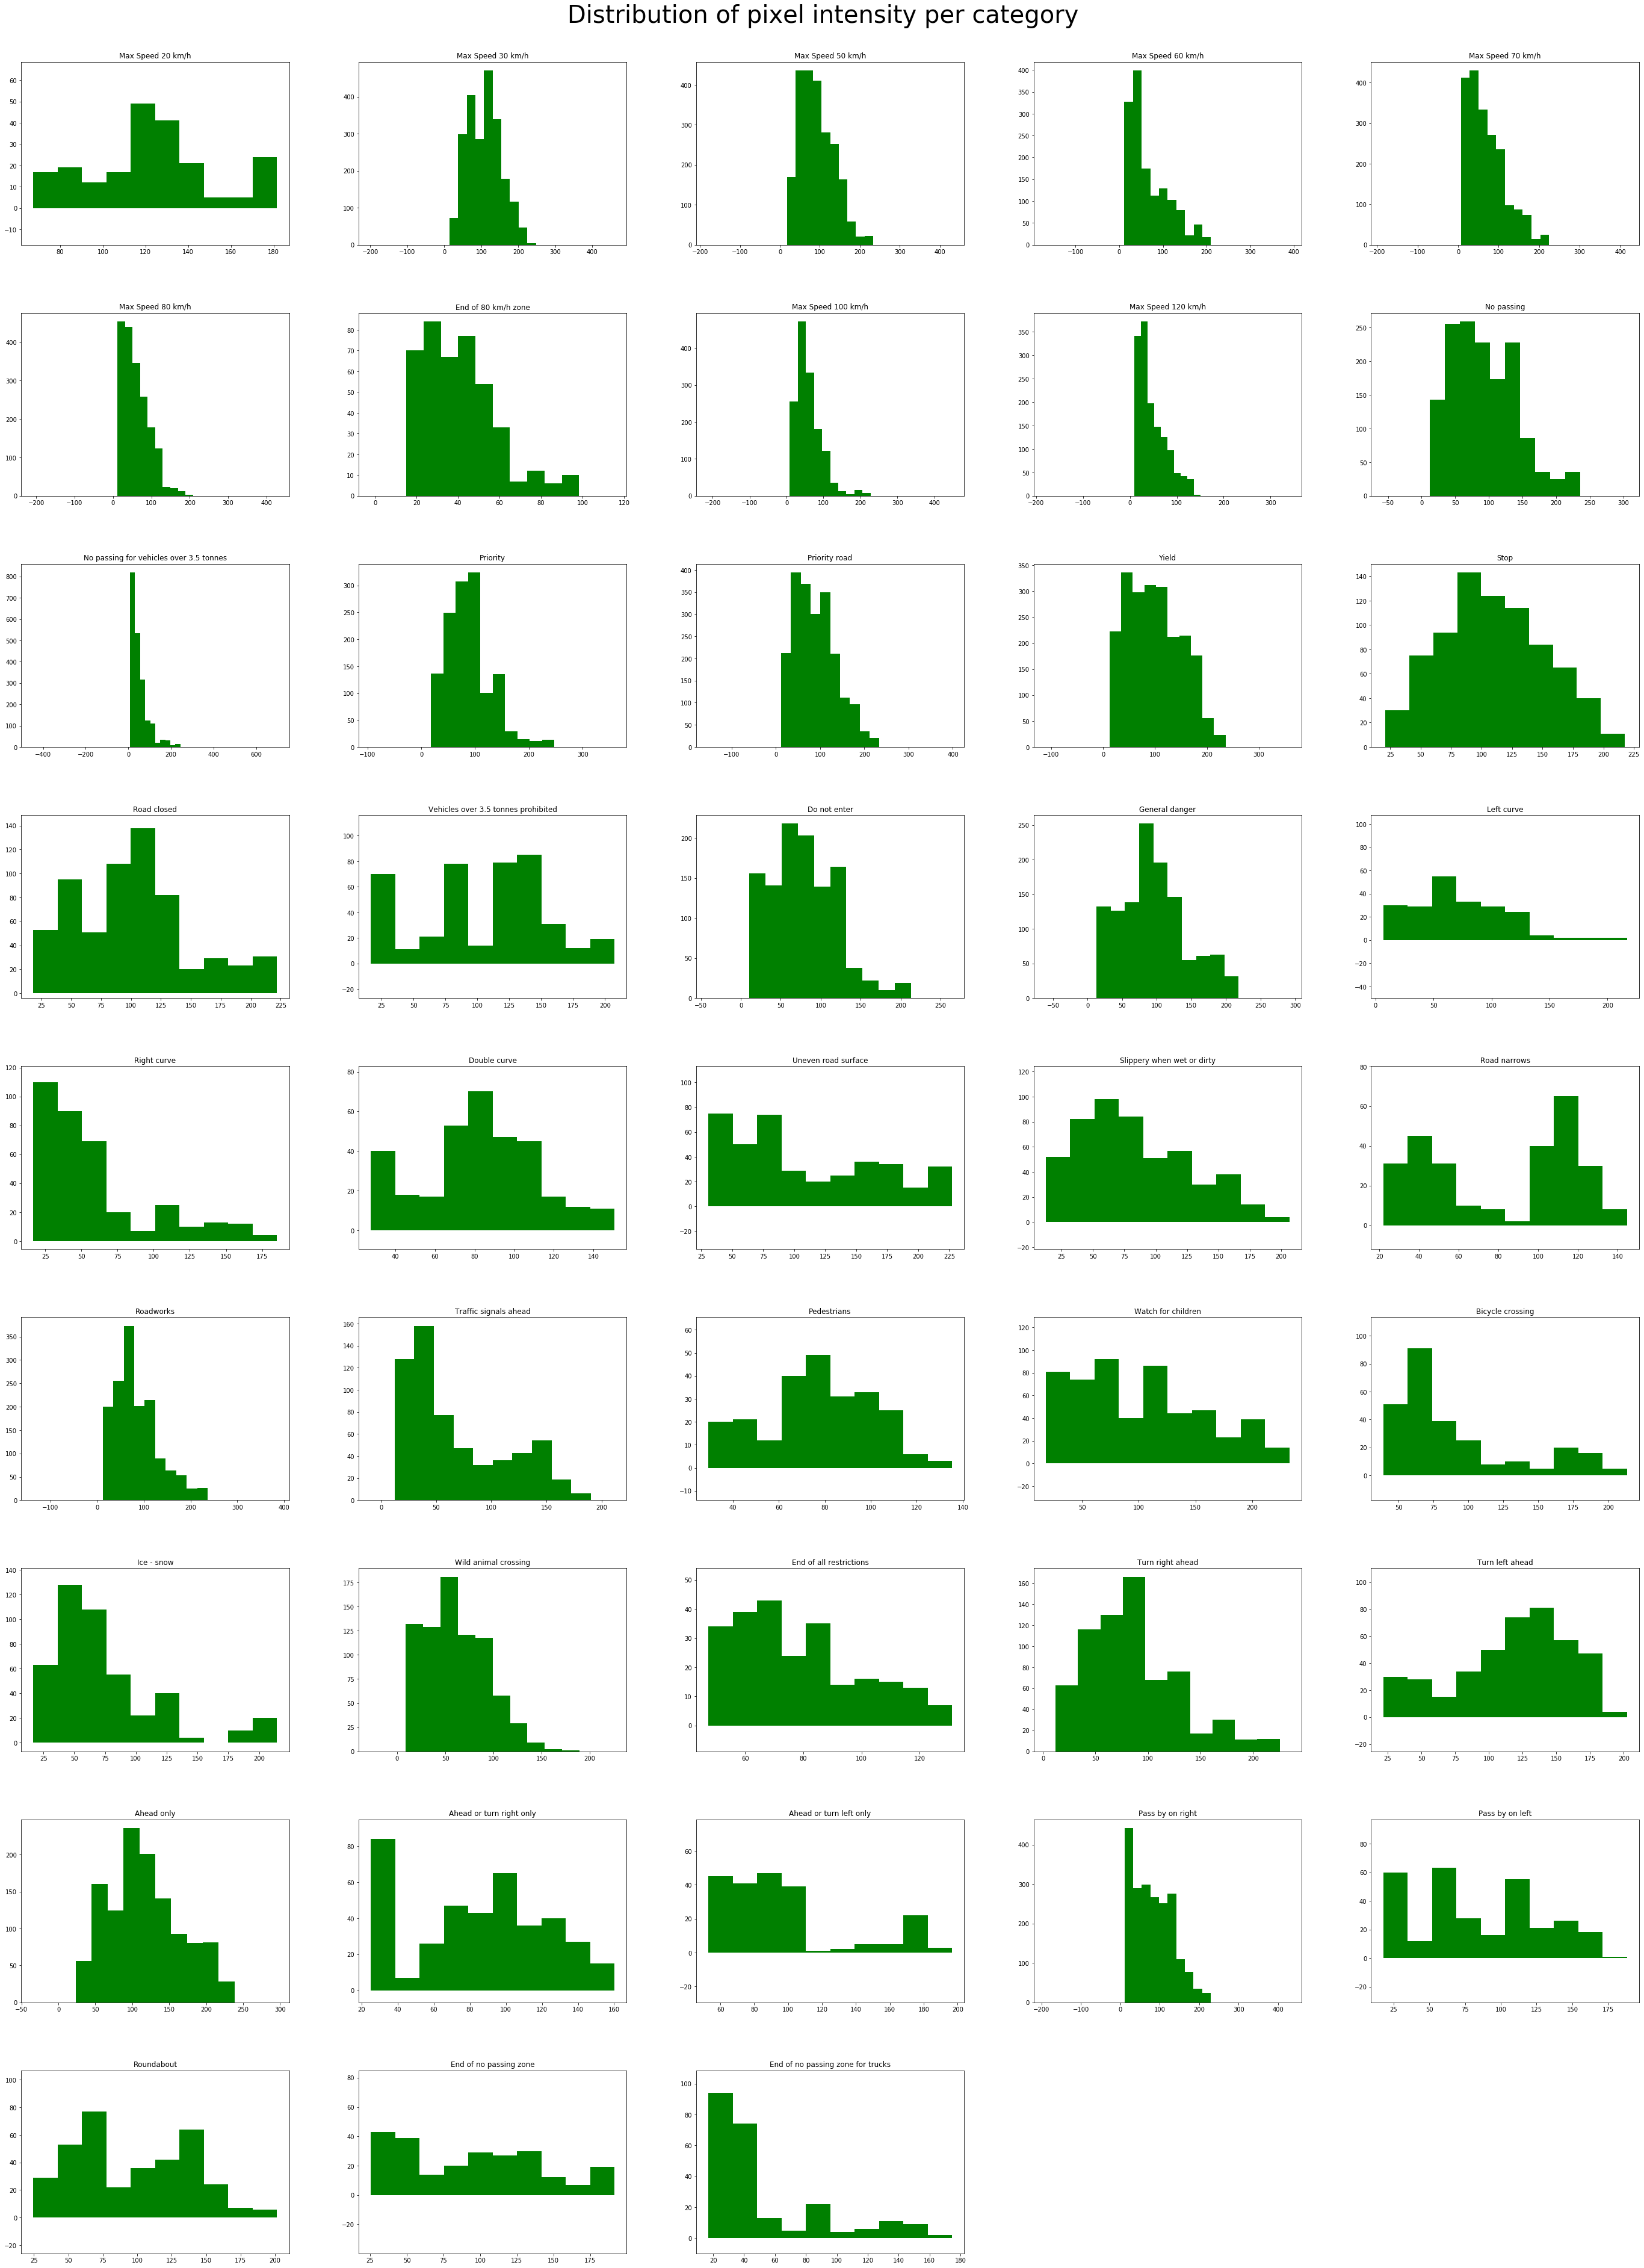

In [105]:
# Create the main figure:
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category + "_ax" for category in class_names]

for i in range(len(class_names)) :
    
    axes[i] = fig.add_subplot(len(class_names), 5 , i+1)
        
    fig.set_figheight(250)
    fig.set_figwidth(40)
    
    category = class_names[i]
    values = df_pixels[df_pixels.Category == category]["Picture avg"]
    
    axes[i].hist([values], bins = 10, facecolor = 'green')
    #sns.histplot(values)
    
    axes[i].axis('equal')  
    axes[i].set_title(class_names[i])

    
fig.tight_layout(pad=8.0)
fig.suptitle("Distribution of pixel intensity per category", fontsize=40, y= 1.0)

plt.show()     

## Inspect 5 random pictures from the Test directory

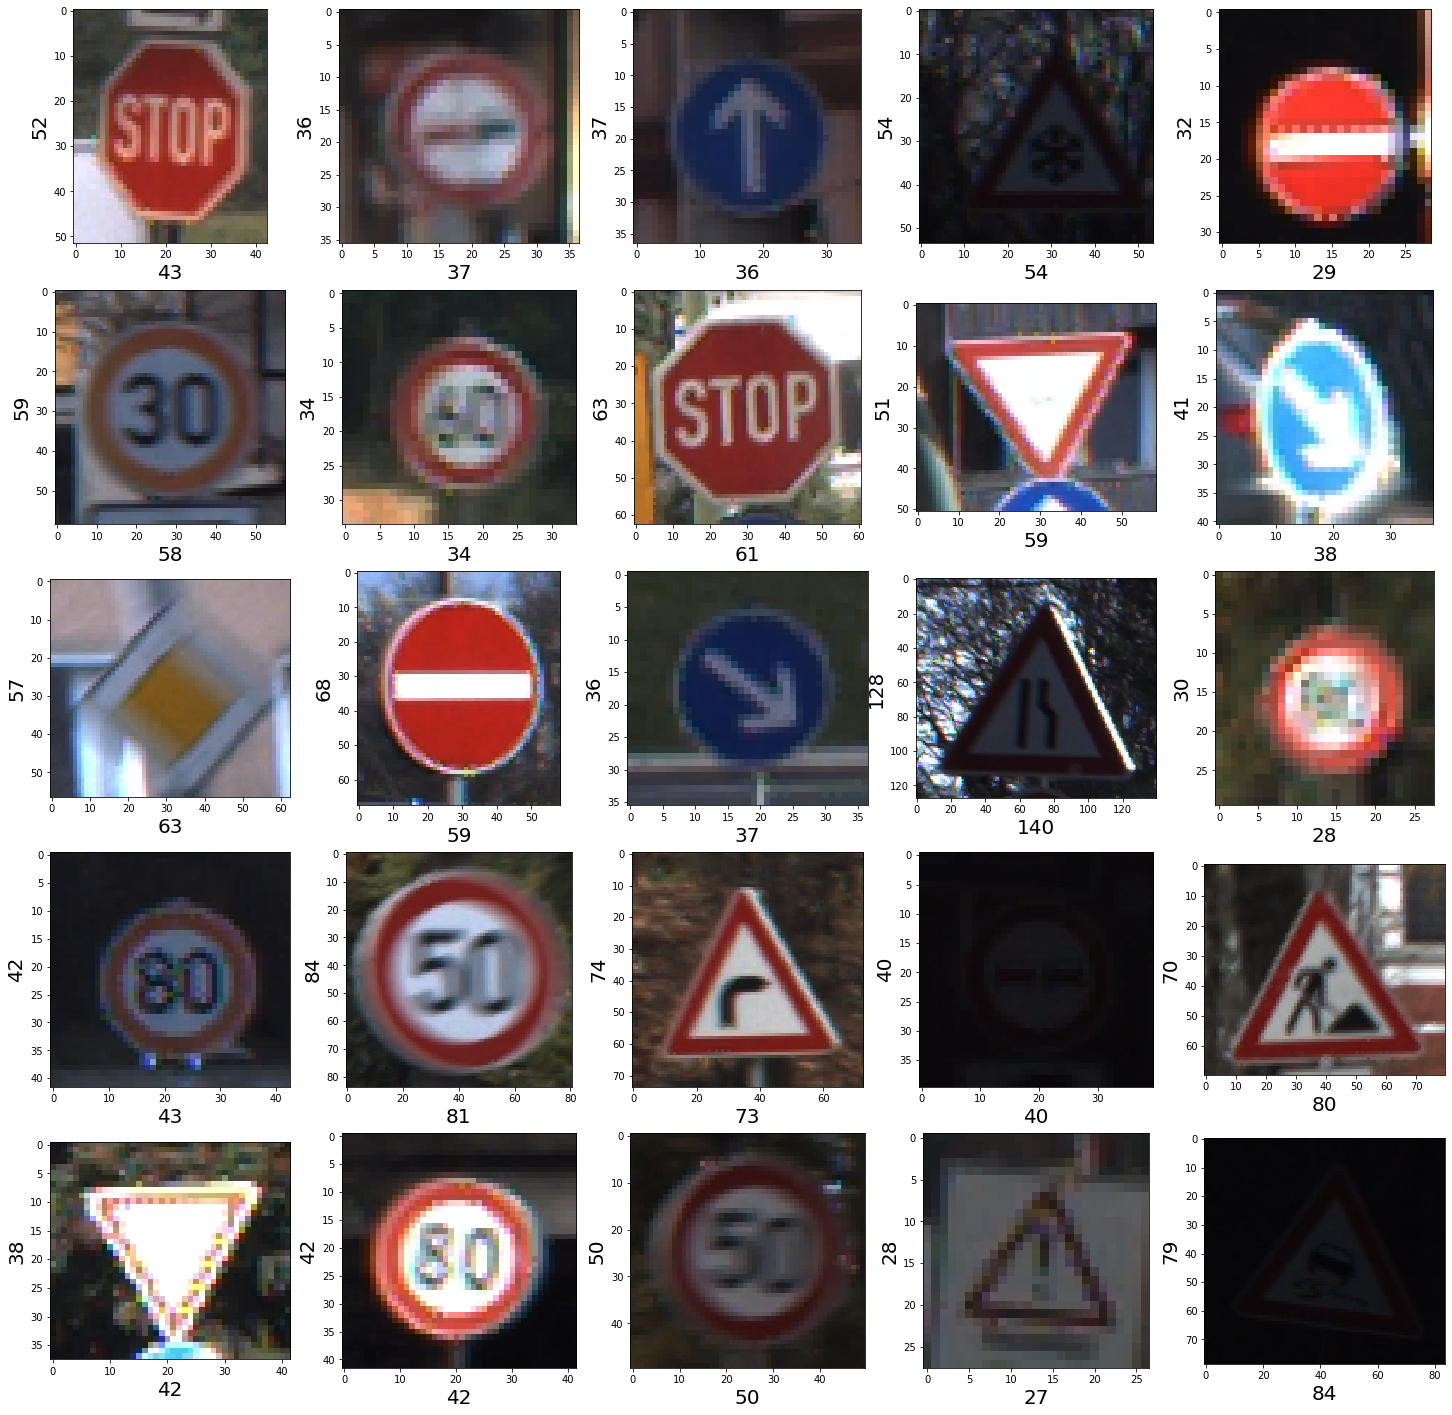

In [91]:
imgs = os.listdir(test_dir)
from matplotlib.image import imread

plt.figure(figsize=(25,25))

for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_dir + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    #plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image
    
    

## 1.1 Exploratory data analysis 
<a class="anchor" id="1_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Explore the number of files using .value_counts()





## 1.2 Data visualization 
<a class="anchor" id="1_2"></a>
#### [Return to index](#main_title)

In [ ]:
# Create a histogram with the number of pictures per category:





In [ ]:
# Create a box-plot with the average pixel intensity per picture:





In [ ]:
# Visualize 25 random pictures from the test dataset:





***
# 2. Preprocessing + Literature review 
<a class="anchor" id="2"></a>
#### [Return to index](#main_title)

## 2.1 Data pre-processing 
<a class="anchor" id="2_1"></a>
#### [Return to index](#main_title)

In [42]:
#bottle_resized = resize(bottle, (140, 54))

img_width = 30
img_height = 30

x_test_resized = [ resize(image, (img_width, img_height)) for image in x_test]

In [60]:
sample_pic = x_test[20 ]
sample_resized = resize(sample_pic, (500,500))

In [52]:
x_test_resized[0]

array([[[0.45194771, 0.5423268 , 0.67928105],
        [0.45156863, 0.53882353, 0.66866667],
        [0.45849673, 0.53882353, 0.67313725],
        ...,
        [0.39411765, 0.46013072, 0.57633987],
        [0.38717647, 0.47592157, 0.58094118],
        [0.35120261, 0.42956863, 0.53194771]],

       [[0.44905882, 0.55023529, 0.68670588],
        [0.45211765, 0.54968627, 0.68223529],
        [0.4548366 , 0.54614379, 0.67869281],
        ...,
        [0.46411765, 0.55398693, 0.68784314],
        [0.46858824, 0.55152941, 0.67917647],
        [0.46871895, 0.54823529, 0.67016993]],

       [[0.45732026, 0.54901961, 0.67843137],
        [0.45254902, 0.55117647, 0.68117647],
        [0.44281046, 0.54477124, 0.67091503],
        ...,
        [0.47058824, 0.56078431, 0.70163399],
        [0.47392157, 0.55745098, 0.69803922],
        [0.46424837, 0.55686275, 0.69411765]],

       ...,

       [[0.45490196, 0.53333333, 0.65490196],
        [0.44764706, 0.5254902 , 0.63862745],
        [0.45457516, 0

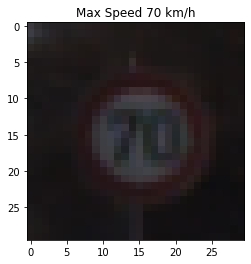

In [63]:
index = 20

plt.figure()
plt.imshow(x_test_resized[index ], cmap = 'gray')
plt.title(y_test[index])
plt.show()

In [ ]:
# Resize all pictures: 
# Use pillow package (pip install PIL) then -> from PIL import Image . Use .fromarray() and .resize() methods to load and resize images.







In [ ]:
# Shuffle train pictures:

shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]


In [ ]:
# Split the train data into train and validation set:

X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)




In [ ]:
# One hot encoding the labels:






## 2.2 Literature Review 
<a class="anchor" id="2_2"></a>
#### [Return to index](#main_title)

<br/>
<br/>
Data review and justification for the choosing the model below will be detailed in the Markdown report.
<br/>
<br/>

***
# 3. Implementation + results 
<a class="anchor" id="3"></a>
#### [Return to index](#main_title)

## 3.1 Model implementation 
<a class="anchor" id="3_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Create a CNN model:





### 3.1.1 CNN Architecture  
<a class="anchor" id="3_1_1"></a>
#### [Return to index](#main_title)

In [ ]:
# Discuss CNN model and add more layers if neccesary:






## 3.2 Model training and parameter tuning
<a class="anchor" id="3_2"></a>
#### [Return to index](#main_title)

In [ ]:
# Train the model:







## 3.3 Performance review
<a class="anchor" id="3_3"></a>
#### [Return to index](#main_title)

In [ ]:
# Plot accuracy vs loss performance and discuss the need of data augmentation:




